# Training Models
Two different ways to train linear regression models:
1. Direct "closed form" equation that directly computes the model parameters that best fit the model to the training set (i.e. the model parameters that minimise the cost function over the training set)
2. Use an iterative operation called _gradient descent_ that gradually tweaks the model parameters to minimise the cost function eventually converging to the same set of parameters as the first method.

Polynomial regression is a more complex model that can fit non-linear datasets. Since the model has more parameters than Linear Regression, it is more prone to overfitting the data. To detect whether this is the case, _learning curves_ are used along with _regularisation techniques_ to reduce the risk of overfitting.

Two common models used for classification are: Logistic Regression and Softmax Regression.

### Linear Regression
The first linear regression model of life satisfaction was given by the equation 

$$life\_satisfaction = \theta_{0} + \theta_{1} \times GDP\_per\_capita$$ 

The model is a linear function of the input feature GDP_per_capita. $\theta_{0}$ and $\theta_{1}$ are the model's parameters. The linear model computes a weighted sum of the input features plus a constant called the _bias term_ (or the _intercept term_).

$$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

Where $\hat{y}$ is the predicted value, n is the number of features, $x_{i}$ is the $i^{th}$ feature value, $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1}, \theta_{2}, ..., \theta_{n}$)

The equivalent vectorised form of the above equation is

$$\hat{y} = h_{\theta}(x) = \mathbf{\theta} \bullet \mathbf{x} $$

Where $\theta$ is the model's _parameter vector_, containing the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ to $\theta_{n}$. $\mathbf{x}$ is the instance's _feature vector_ containing $x_{0}$ to $x_{n}$, with $x_{0}$ always equal 1. $\theta \bullet \mathbf{x}$ is the dot product of the vectors $\theta$ and $\mathbf{x}$ which is equal to $\theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$ and $h_{\theta}$ is the _hypothesis function_ using the model parameters, $\theta$.

Note that in machine learning, vectors are usually stored as _column vectors_ so getting the prediction requires $\theta$ to be transposed $\hat{y} = \theta^{T}\mathbf{x}$.

A reminder that linear regression model is evaluated by the Root Mean Square Error and so to train a linear regression model, the model parameters should be computed such that it minimises RMSE. In practice, the MSE is easier to minimise than the RMSE and can lead to the same result (minising the MSE also minimises its square root).

The MSE of a Linear Regression model with hypothesis $h_{\theta}$ on a training set $\mathbf {X}$ is calculated by:
$$ MSE(\mathbf{X}, h_{\theta}) = \frac{1}{m} \sum^{m}_{i=1} (\theta^{T}\mathbf{x}^{i}-y^{i})^2$$

### The Normal Equation
To find the value of $\theta$ that minimises the cost function, the _closed-form solution_ (the mathematical equation that gives the result directly) is called the _Normal Equation_.
$$ \hat{\theta} = (\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T} \mathbf{y} $$
Where $\hat{\theta}$ is the value of $\theta$ that minimises the cost function and $\mathbf{y}$ is the vector of target values containing $y^{1}$ to $y^{m}$.

To generate some linear looking data:

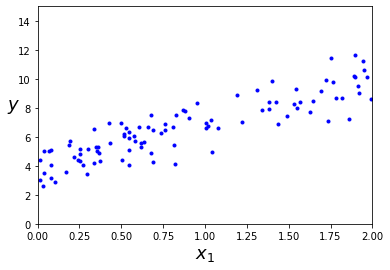

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Compute $\hat{\mathbf{\theta}}$ using the Normal Equation. Use the inv() function from NumPy's linear algebra module to compute the inverse of the matrix and use the dot() method for matrix multiplication:

In [2]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.98243611],
       [3.00095428]])

The actual function used to generate noise is $y = 4 + 3x_{1} + $ Gaussian noise. The perfect answer would have been $\theta_{0} = 4$ and $\theta_{1} = 3$ instead of $\theta_{0} = 3.805$ and $\theta_{1} = 3.405$ but the noise made it impossible to recover the original function.

To make a prediction using the value of $\hat{\theta}$:

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.98243611],
       [9.98434467]])

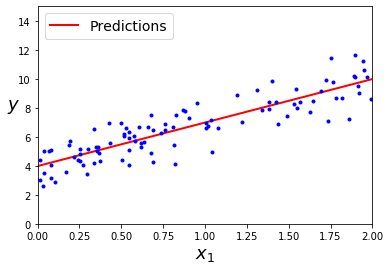

In [4]:
#Plot the model's predictions
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
#Performing linear regression using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.98243611]), array([[3.00095428]]))

In [6]:
lin_reg.predict(X_new)

array([[3.98243611],
       [9.98434467]])

The LinearRegression class is based on the scipy.linalg.lstsq() function which can be called directly

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.98243611],
       [3.00095428]])

The function computes $\hat{\theta} = \mathbf{X}^{+}\mathbf{y}$, where $\mathbf{X}^+$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse) which can be computed using np.linalg.pinv()

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.98243611],
       [3.00095428]])

The pseudoinverse is computed using standard matrix factorisation technique called _Singular Value Decomposition_ (SVD) that can decompose the training set matrix $\mathbf{X}$ into the matrix multiplication of three matrices $\mathbf{U, \Sigma, V^T}$. The pseudoinverse is $\mathbf{X^+=V\Sigma^+ U^T}$. 

To compute the matrix $\Sigma^+$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse and finally transposes the resulting matrix. This approach is more efficient than computing the Normal Equation and handles edge cases nicely. The normal equation might not work if the matrix $\mathbf{X^T X}$ is not invertible (i.e. singular) such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined.

### Computational Complexity
The Normal Equation computes the inverse of $\mathbf{X^T X}$ which is an $(n+1) \times (n+1)$ matrix (where n is the number of features). The _computational complexity_ of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$ depending on the implementation, i.e. if the features are doubled then the computational time increases by $2^3.4 = 5.3$ to $2^3 = 8$ times.

The SVD approach used by Scikit-Learn's LinearRegression class is about $O(n^2)$. 

Both the SVD and Normal Equation approach are very slow when the number of features is large (~100,000).

However, once the Linear Regression model is trained (using Normal Equation or other algorithms), predictions are very fast; the computational complexity is linear with respect to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) takes about twice as much time.

### Gradient Descent
_Gradient Descent_ is a generic optimisation algorithm capable of finding optimal solutions to a range of problems. It works by tweaking the parameters iteratively to minimise a cost function and is suitable for larger datasets.

Gradient descent measures the local gradient of the error function with respect to the parameter vector $\mathbf{\theta}$ and it goes in the direction of descending gradient. Once the gradient reaches 0, it is at a minimum.

The initial $\mathbf{\theta}$ is filled with random values known as _random initialisation_ and then the model is improved gradually by taking small steps at a time trying to decrease the cost function (e.g. the MSE) until the algorithm converged at a minimum.

<img src="Figure%204-3.PNG" alt="Drawing" style="width: 600px;"/>

An important parameter in gradient descent is the size of the steps, determined by the _learning rate_ hyperparameter. If the learning rate is too small, the algorithm will have to go through many steps to converge which takes a long time.

<img src="Figure%204-4.PNG" alt="Drawing" style="width: 600px;"/>

Alternatively, if the learning rate is too large, the algorithm might climb to larger and larger values and diverge without finding a good solution.

<img src="Figure%204-5.PNG" alt="Drawing" style="width: 600px;"/>

Finally, the terrain of the cost function is not always a bowl. There might be holes, ridges or plateaus making convergence at the minimum difficult. Figure 4.6 illustrates common problems with gradient descent: if the random initialisation starts the algorithm on the left, the algorithm will converge at a _local minimum_ which is not as optimal as the _global minimum_. If it initialises on the right, it has to cross a plateau which if the algorithm stops too early, it will never converge at the global minimum.

<img src="Figure%204-6.PNG" alt="Drawing" style="width: 600px;"/>

Fortunately, the MSE cost function for a Linear Regression model is a *convex function*, i.e. any line segment drawn between two points chosen on the curve never crosses the curve. This means that the function has no local minima just one global minimum. It is also a continuous function with a slope that never changes abruptly (the derivative is *Lipschitz continuous*). This implication is that gradient descent is guaranteed to converge close to the global minimum given enough time and a sufficiently high learning rate.

The cost function has the shape of a bowl but can be elongated if features have vastly different scales. Figure 4.7 shows gradient descent on a training set where features 1 and 2 have the same scale (left) compared to when the training set has a feature 1 has much smaller values than feature 2 (right).

<img src="Figure%204-7.PNG" alt="Drawing" style="width: 800px;"/>

On the left, the gradient descent algorithm goes straight towards the minimum, thereby reaching it quickly, On the right, the first direction goes almost orthogonal to the direction of the global minimum then approaches down a flat valley eventually to a minimum which can take a long time. Therefore, when using gradient descent the features should have a similar scale to avoid this problem.

The algorithm searches in the model's _parameter space_ so the more parameters the model has, the more dimensions the algorithm has to explroe before reaching the global minimum.

### Batch Gradient Descent

To implement gradient descent, compute the gradient of the cost function with respect to each model parameter $\theta_{j}$. The partial derivative of the cost function with respect to the parameter $\theta_{j}$, $\frac{\partial}{\partial \theta_{j}}MSE(\theta)$
$$\frac{\partial}{\partial \theta_{j}}MSE(\theta) = \frac{2}{m}\sum^m_{i=1} (\theta ^T \mathbf{x}^i - y^i)x_j^i$$

Instead of computing the partial derivatives individually, the gradient vector of the cost function can compute all the partial derivatives in one equation. The gradient of the vector, $\nabla_{\theta}MSE(\mathbf{\theta})$, contains all the partial derivatives of the cost function (one for each model parameter).

<img src="Equation%204.6.PNG" alt="Drawing" style="width: 300px;"/>

The equation shows that the formula performs calculations over the full training set, __X__, at each gradient descent step, but scales well with the number of features. Therefore, implementing gradient descent on a large training set is slow but tends to perform well with large number of features.

Once the gradient vector that goes uphill is found, go in the opposite direction to go downhill, i.e. subtract by $\nabla_\theta MSE(\mathbf{\theta})$ from $\mathbf{\theta}$. This is where the _learning rate_, $\eta$, is introduced to multiply the gradient vector by to determine the size of the downhill step.

$$\mathbf{\theta}^{(next \space step)} = \mathbf{\theta} - \eta \nabla_\theta MSE(\theta)$$

To implement the algorithm:

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.98243611],
       [3.00095428]])

<img src="Figure%204-8.PNG" alt="Drawing" style="width: 500px;"/>

The left case illustrates when the learning rate is too low and the algorithm takes a long time to converge to the global minimum. The middle case is a good learning rate, where convergence happens after a few iterations. The case on the right is when the learning rate is too high and the algorithm diverges and never reaches the minimum.

To find a good learning rate, grid search can be used. However, the number of iterations in the grid search should be limited to stop the grid search if the learning rate causes divergence.

The number of iterations set to run the algorithm should interrupt the algorithm when the gradient vector becomes tiny - that is when the norm becomes smaller than a tiny number, $\varepsilon$ called the _tolerance_, because this is the point when the Gradient Descent has (almost) reached the minimum.

### Convergence Rate

As the cost function is convex and its slope does not change abruptly (for MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but it could take a long time to compute: it can take $O(1/\varepsilon)$ iterations to reach the optimal solution. If the tolerance is divided by 10, the algorithm will take 10 times as long to run.

### Stochastic Gradient Descent
The main problem is that Batch Gradient Descent uses the whole training set to compute the gradients at every step and so becomes slow with large training sets. The opposite extreme is _Stochastic Gradient Descent_ picks a random instance in the training set at every step and computes the gradients based on that single instance. SGD can be implemented as an out of core algorithm as only a single instance has to be in memory at a time. This also means that SGD is much faster as there is very little data being manipulated for each iteration.

However, the stochastic (random) nature of the algorithm makes is less regular than Batch Gradient Descent: instead of gently decreasing the gradient until a minimum is reached, the function will oscillate and only decreasing the gradient on average. Over time it will still end up very close to the minimum but will continue to oscillate even at the minimum so the algorithm stops at a good parameter value but not the optimal one.

<img src="Figure%204-9.PNG" alt="Drawing" style="width: 600px;"/>

For cost functions with irregular terrains like the one in Figure 4-6, the algorithm can jump out of local minima towards the global minimum due to its random nature which cannot be done for Batch Gradient Descent.

Randomness can be used to escape local optima but is bad because the algorithm never setttles at the minimum. The solution is to gradually decrease the learning rate. Start with a large learning rate to make quick progress and escape local minima but tune it to go smaller and smaller to allow the algorithm to settle near the global minimum. The process is known as _stimulated annealing_. The function determines the learning rate at each iteration called the _learning schedule_. If the learning rate is reduced too quickly, the algorithm can still get trapped at a local minima but if the learning rate is reduced too slow, the computational time will be long.

The following example implements SGD using a simple learning schedule:

In [10]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1) # random initialisation

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.98699457],
       [3.02891875]])

By convention, the algorithm iterates by rounds of m iterations; each round is called an _epoch_. While Batch Gradient Descent iterated 1000 times through the whole training set, this code goes through the training set 50 times to reach a good solution.

Note that the instances are picked randomly so some instances might be picked several times per epoch while others might not be picked at all. To ensure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure that the input features and labels are shuffled together) then go through it instance by instance, then shuffle the training set again. However, this method reaches convergence more slowly.

When using SGD, the training instances must be independent and identically distributed (IID) to ensure the parameters get pulled towards the global optimum on average. The instances must then be shuffled at the beginning of every epoch or else if the instances are sorted by label then SGD will start by optimizing for one label and then the next and so on and will not settle close to the global minimum.

Scikit_Learn's SGDRegressor class optimises the squared error cost function by default. The follow example runs for maximum 1000 epochs (max_iter = 1000) or until the loss drops by less than 1e-3 during one epoch (tol=1e-3) starting from a learning rate of 0.1 (eta0=0.1) using the default learning schedule and does not use any regularisation (penalty=None):

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.9521664]), array([2.97540103]))

### Mini-batch Gradient Descent
_Mini-batch gradient descent_ is a mixture of batch gradient descent and stochastic gradient descent in that mini-batch GD computes gradients on small random sets of instances called _mini-batches_. Mini-batch gradient descent gets performance boost from hardware optimisation like using GPUs.

The algorithm progresses in parameter space in a less erratic way compared to SGD especially with large mini-batches. As a result, mini-batch GD tends to get closer to the minimum than SGD but at the same time might be difficult for it to escape local minima.

Batch GD stops at the minimum, whereas mini-batch GD and SGD continues to explore parameter space after reaching near minimum. However, Batch GD takes a lot of time per step whereas mini-batch GD and SGD are much faster if the learning schedule is good.

<img src="Figure%204-11.PNG" alt="Drawing" style="width: 550px;"/>

### Polynomial Regression
To generate a linear model to fit non-linear data, add powers of each feature as new features and train a linear model on this extended set of features.

Generate some non-linear data using a simple quadratic equation:

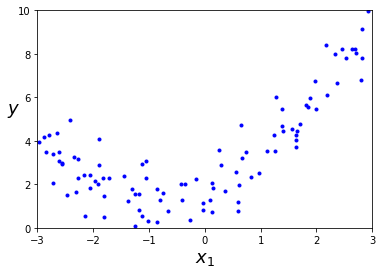

In [13]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

A straight line cannot fit this data properly, so Scikit-Learn's `PolynomialFeatures` class can be used to transform the training data, adding the square (2nd degree polynomial) of each feature in the training set as new features (in this case there is only one feature).

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [15]:
X_poly[0]

array([-0.75275929,  0.56664654])

`X_poly` now contains the original feature, X, and the square of this feature. The `LinearRegression` model can now be extended to this training data.

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The model estimates $\hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78$ where the original function was $y = 0.5x_1^2 + 1.0x_1 + 2.0 + Gaussian \space noise$. 

Note that Polynomial Regression can find the relationship between features (Linear Regression can't) because `PolynomialFeatures` adds combinations of features up to a given degree. If there were two features: a and b, `PolynomialFeatures` with `degree=3` would not only add the features $a^2, a^3, b^2, b^3$ together but also the combinations of $ab, a^2b, ab^2$.

`PolynomialFeatures(degree=d)` transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$ features.

### Learning Curves


A high degree polynomial will fit the data better but tends to overfit while a low degree polynomial tends to underfit the data. Since the data above is generated using a quadratic formula, it would make sense that a second degree polynomial would fit the data best.

<img src="Figure%204-14.PNG" alt="Drawing" style="width: 600px;"/>

If the model performs well on the training data but performs poorly on cross-validation tests, then the model is overfitting. If it performs poorly on both, it is underfitting.

Another way to assess whether the model is overfitting or underfitting is through _learning curves_ : these are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. 

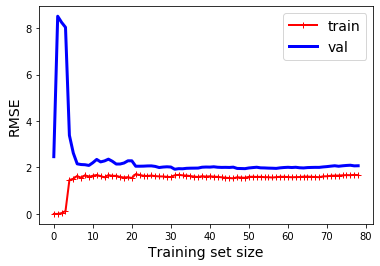

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Start by looking at the model's performance in the training data:
- The curve starts at zero because for the first one or two instances, the model fits the training set perfectly.
- As new instances are added, the data is noisy and is not linear and so the linear model starts to fail in fitting the model perfectly
- The plateau happens when adding new instances does not make the model perform better or worse on average.

Looking at the validation error:
- Initially, the error is quite big because the model when trainined on one or two instances cannot generalise to other data.
- When the model is trained on more data, the validation error decreases but plateaus close to the other curve, as a linear model cannot properly model a quadratic dataset.

These learning curves are typical for a __underfitted model__. Both curves reached a plateau: they are close and fairly high.

__If a model is underfitting, adding more training examples will not help. Instead, a more complex model is needed or come up with better features.__

Consider a learning curve for a 10th-degree polynomial model on the same training data:

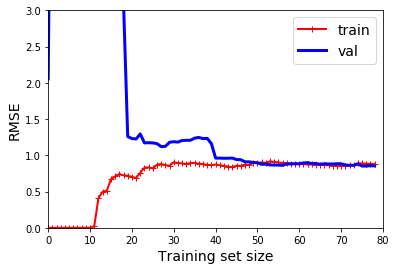

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression, X, y)

The differences between this learning curve and the previous one are:

- The error on the training data is much lower than with the Linear Regression model
- There is a gap between curves, i.e. the model performs significantly better on the training data than on the validation data, which is the hallmark of a overfitting model. A larger training set would close the gap between the curves.

__One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.__

### The Bias/Variance Tradeoff

An important theoretical result of statistics and ML is that a model's generalisation error can be expressed as the sum of three very different errors:

_Bias_ : This generalisation error is due to wrong assumptions. For example, assuming the data is linear when it is quadratic. A high bias model is most likely to underfit training data.

_Variance_ : This is when the model is excessively sensitive to small variations in the training data. A model with many degrees of freedom (high-degree polynomial model) is likely to have high variance and overfit the training data.

_Irreducible Error_ : This is due to the noisiness of the data. The error can only be reduced by cleaning up the data (e.g. fix data sources like broken sensors/detectors or remove outliers)

Increasing the model's complexity typically increases variance and reduces bias and vice versa

### Regularised Linear Models
One way to reduce overfitting is to regularise the model (i.e. constrain it): the fewer degrees of freedom it has, the harder it will be to overfit the data. A simple way to regularise a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularisation is typically achieved by constraining the weights of the model. Ridge Regression, Lasso Regression and Elastic Net are ways to implement constraints to the weights.

### Ridge Regression
*Ridge Regression*, or *Tikhonov regularisation*, is a regularised version of Linear Regression: a *regularisation term* of $\alpha \sum_i^n = \theta_i^2$ is added to the cost function. This forces the model to fit the data but also keep the weights as small as possible. The regularisation term should only be added to the cost function during training and an unregularised performance measure should be used to evaluate the model's performance after training.

It is quite common for the cost function used during training to be different from the performance measure used for testing with regularisation being one of the possible reasons.

The hyperparameter $\alpha$ controls how much the model is regularised. If $\alpha = 0$ then Ridge Regression is just a Linear Regression. If $\alpha >> 0$, then the weights become close to 0 and the regression line becomes a flat line through the data's mean.

The Ridge Regression cost function is
$$ J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2$$

Note that the bias term $\theta_0$ is not regularised (sum starts from $i=1$). If the vector, $\mathbf{w}$, is defined as the vector of feature weights from $\theta_1$ to $\theta_n$, then the regularisation term is $\frac{1}{2} (\parallel\mathbf{w}\parallel_2)^2 $, where $\mathbf{w}_2$ is the $\ell_2$ norm of the weight vector. For gradient descent, add $\alpha\mathbf{w}$ to the MSE gradient vector.

It's important to scale the data with `StandardScaler` before performing Ridge Regression, as it is sensitive to scale of input features. This is true for most regularised models.

Figure 4-17 shows Ridge models trained on some linear data using different $\alpha$ values. On the left, plain Ridge models are used leading to linear predictions. On the right, the data was expanded using `PolynomialFeatures(degree=10)` and scaled with `StandardScaler`. Finally, the Ridge model was applied to the resulting features (Polynomial Regression with Ridge Regularisation). Increasing $\alpha$ leads to flatter (i.e. less extreme and more reasonable) predictions; this reduces model variance but increases bias.

<img src="Figure%204-17.PNG" alt="Drawing" style="width: 600px;"/>

As with linear regression, Ridge Regression can be computed using a closed form equation or by performing Gradient Descent. 

$$ \hat{\theta} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y} $$

Where $\mathbf{A}$ is the $(n+1)\times(n+1)$ _identity matrix_ except with 0 in the top left cell, corresponding to the bias term.

To implement Ridge Regression with Scikit-Learn using a closed-form solution:

In [19]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [20]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [21]:
#Implement using SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

The penalty hyperparameter sets the type of regularisation term to use. "`l2`" indicates that the SGD should add a regularisation term to the cost function equal to half the square of the $\ell_2$ norm of the weight vector, i.e. Ridge Regression.

### Lasso Regression
_Least Absolute Shrinkage and Selection Operator Regression_ (Lasso regression) is another regularised version of Linear Regression. It adds a regularisation term to the cost function, but it uses the $\ell_1$ norm of the weight vector instead of half the square of the $\ell_2$ norm.

$$ J(\theta) = MSE(\theta) + \alpha \sum^n_{i=1}|\theta_i| $$

<img src="Figure%204-18.PNG" alt="Drawing" style="width: 550px;"/>

An important characteristic of Lasso Regression is that it seems to eliminate the weights of least important features (sets them to 0). Looking at the dashed line of $\alpha = 10^{-7}$, the curve looks quadratic and so all the higher order polynomial terms have been set to zero. Lasso Regression automatically performs feature selection and outputs a _sparse_ model (i.e. with few non-zero feature weights).

<img src="Figure%204-19.PNG" alt="Drawing" style="width: 600px;"/>

The top left plot shows background contours (ellipses) that represent unregularised MSE cost function ($\alpha = 0$), and the white circles show Batch Gradient Descent path with that cost function. The foreground contours (diamonds) represent $\ell_1$ penalty and the triangles show the BGD path for this penalty only ($\alpha \rightarrow \infty$). The path first reaches $\theta_1 = 0$ then rolls down the gutter until it reaches $\theta_2 = 0$.

On the top right plot, the contours represent the same cost function plus an $\ell_1$ penalty with $\alpha = 0.5$. The global minimum is on the $\theta_2 = 0$ axis. BGD first reaches $\theta_2 = 0$ then rolls down the gutter until it reaches the global minimum.

The two bottom plots show the same thing but uses an $\ell_2$ penalty instead. The regularised minimum is closer to $\theta = 0$ than the unregularised minimum, but the weights do not get fully eliminated.

The Lasso cost function is not differentiable at $\theta_i = 0$ (for $i = 1, 2, n$) but Gradient Descent still works fine if a _subgradient vector_ $\mathbf{g}$ (intermediate vector between the gradient vectors around that non-differentiable point) instead when any $\theta_i = 0$.

<img src="Equation%204-11.PNG" alt="Drawing" style="width: 400px;"/>

Example of implementing Lasso regression with Scikit-Learn's `Lasso` class. Note that this is equivalent to using `SGDRegressor(penalty="l1")`.

In [22]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net
Elastic Net is between Ridge Regression and Lasso Regression. The regularisation term is a simple mix of both Ridge and Lasso regularisation terms defined by the mix ratio, r. When $r=0$, Elastic Net is equivalent to Ridge Regression and when $r=1$, Elastic Net is equivalent to Lasso Regression.

$$ J(\theta) = MSE(\theta) + r\alpha \sum^n_{i=1} |\theta_i| + \frac{1-r}{2} \alpha\sum^n_{i=1} \theta_i^2 $$

When to use plain Linear Regression, Ridge, Lasso or Elastic Net:

- It's almost always preferable to have some regularisation so plain Linear Regression is rarely used
- Ridge Regression is a good default
- Lasso and Elastic Net are good choices if you believe only a few features are actually useful as they reduce the weight of useless features down to zero.
- Elastic Net is preferred over Lasso as Lasso tends to behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Following code is an implementation of ScikitLearn's `ElasticNet(l1_ratio=0.5)` where `l1_ratio` corresponds to the mix ratio, r.

In [23]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping
A different way to regularise iterative learning algorithms like Gradient Descent is by stopping training as the validation error reaches a minimum called _early stopping_. Figure 4-20 is a complex model (high degree Polynomial Regression) being trained using BGD. As the epochs go by, the algorithm learns and the prediction error (RMSE) on the training set goes down and also the prediction error on the validation set. However, validation error increases after reaching a minimum due to the model overfitting the data. Early stopping stops training as the validation error reaches the minimum.

<img src="Figure%204-20.PNG" alt="Drawing" style="width: 500px;"/>

For Stochastic and Mini-Batch Gradient Descent, the validation curve might not be smooth and so early stopping can be implemented by rolling back to the model parameters when the validation error is at a minimum after it has been above the minimum for some time.

A simple implementation of early stopping:

In [24]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

#prepare the data
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ("std_scaler", StandardScaler())
                       ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


### Logistic Regression
Some regression algorithms can be used for classification tasks such as _Logistic Regression_. It can estimate the probability an instance belongs to a particular class. If the probability calculated is above 50% then the model predicts that instance to be a positive class (labeled "1") and vice versa. This makes it a binary classifier.

### Estimating Probabilities
Like Linear Regression, Logistic Regression model computes a weighted sum of the input features (plus a bias term). but instead of outputing the result directly like the Linear Regression model does, it outputs the _logistic_ of this result.

$$ \hat{p} = h_\theta(\mathbf{x}) = \sigma(\mathbf{x}^T\theta) $$

Where $\sigma$ is the _sigmoid function_ that outputs a function between 0 and 1.

$$ \sigma(t) = \frac{1}{1+\exp{(-t)}} $$

<img src="Figure%204-21.PNG" alt="Drawing" style="width: 500px;"/>

Once the Logistic Regression model has estimated the probability $\hat{p} = h_\theta(\mathbf{x})$ that an instance $\mathbf{x}$ belongs to the positive class, it can make its prediction $\hat{y}$ easily.

<img src="Equation%204-15.PNG" alt="Drawing" style="width: 350px;"/>

Notice that $\sigma(t) < 0.5$ when $t<0$, and $\sigma(t) >= 0.5$ when $t>= 0$, so a Logistic Regression model predicts 1 if $\mathbf{x}^T \mathbf{\theta}$ is positive, and 0 if it is negative.

The score, t, is often called the _logit_, which stems from the logit function, defined as $logit(p) = \log({\frac{p}{(1-p)}})$ and is the inverse of the logistic function. The logit of the estimated probability $p$ will give $t$ back. The logit is also called the _log-odds_, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

### Training and Cost Function
The objective of training is to set the parameter vector $\theta$ so the model estimates high probabilities for positive instances and low probabilities for negative instances. The idea is captured by the cost function (Equation 4-16) for a single training instance $\mathbf{x}$.

<img src="Equation%204-16.PNG" alt="Drawing" style="width: 400px;"/>

The cost function has the following properties:

- $-\log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and the cost will also be very large if the model estimates a probability close to 1 for a negative instance.
- $-\log(t)$ is close to 0 when $t$ is close to 1, so the cost will be close to 0 if estimated probability is close to 0 for a negative instance or close to 1 for a positive instance.

The cost function over the whole training set is simply the average cost over all training instances knonwn as the _log loss_ equation.

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})]$$

There is no known closed-form equation to compute the value of $\theta$ that minimises this cost function. However, the cost function is convex so Gradient Descent (or other optimisation algorithm) will almost always find the global minimum. The partial derivative of the cost function with regards to the j<sup>th</sup> model parameter $\theta_j$ is given by:

$$ \frac{\partial}{\partial{\theta_j}}J(\theta) = \frac{1}{m} \sum^m_{i=1} (\sigma(\theta^T \mathbf{x}^{(i)})-y^{(i)})x_j^{(i)} $$

### Decision Boundaries
To illustrate the concept of Logistic Regression, consider the iris dataset which contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

<img src="Figure%204-22.PNG" alt="Drawing" style="width: 500px;"/>

The first example is to build a classifier to detect the Iris-Virginica type based only on the petal width feature. Start by loading the data:

In [25]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [26]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

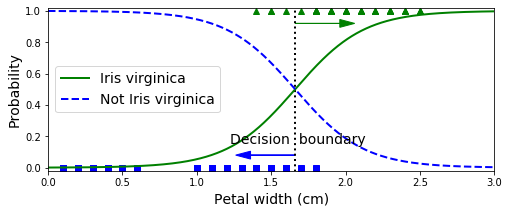

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

#Look at model's estimated probabilities for flowers with petal widths varying from 0 to 3cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The petal width of Iris-Virginica flowers (triangle) ranges from 1.4 to 2.5cm while other iris flowers (squares) generally have smaller petal width, ranging from 0.1 to 1.8cm. There's a bit of overlap in the data but above about 2cm the classifier is highly confident that the flower is an Iris-Virginica while below 1cm it is highly confident it is not a Iris Vieginica. In between these extremes, the classifier is unsure.

If using the model to predict the class using `predict()` method rather than `predict_proba()` method, it will return the class that is the most likely. There is a _decision boundary_ at around 1.6cm where both probabilities are equal to 50%: if the petal width is higher than 1.6cm, the classifier will predict that the flower is an Iris-Virginica or else it will predict that it is not.

In [28]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Figure 4-24 shows the same data with two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. The dashed line is when the model estimates a 50% probability (the decision boundary). The parallel lines running from bottom left to top right shows the probabilities of being an Iris-Virginica output by the model ranging from 15% to over 90%.

<img src="Figure%204-24.PNG" alt="Drawing" style="width: 600px;"/>

The hyperparameter controlling the regularisation strength for ScikitLearn's `LogisticRegression` is not `alpha` but `C` which is the inverse of alpha. The higher the value of C, the less the model is regularised.

### Softmax Regression
The Logistic Regression can be generalised to support multiple classes directly without training multiple binary classifiers with a technique called _Softmax Regression_ or _Multinomial Logistic Regression_.

The idea is given an instance $\mathbf{x}$, the Softmax Regression model first computes a score $s_k(\mathbf{x})$, then estiamtes the probability of each class by applying the _softmax function_ (also called the _normalised exponential_) to the scores. The equation to compute $s_k(\mathbf{x})$ is:

$$ s_k(\mathbf{x}) = \mathbf{x}^T \mathbf{\theta}^{(k)} $$

Each class has its own dedicated parameter vector $\mathbf{\theta}^{(k)}$ which are typically stored as rows in a _parameter matrix_ $\mathbf{\Theta}$.

Once the score for every class for the instance $\mathbf{x}$ is computed, the probability $\hat{p}_k$ that the instance belongs to class k can be estimated by running the scores through the softmax function which computes the exponential of every score and normalises them (dividing by the sum of all the exponentials). The scores are called logits or log-odds (although they are actually unnormalised log-odds).

$$ \hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp{s_k(\mathbf{x})}}{\sum_{j=1}^K \exp({s_j (\mathbf{x}))}} $$

Where $K$ is the number of classes, $\mathbf{s} (\mathbf{x})$ is a vector containing the scores of each class for the instance $\mathbf{x}$ and $\sigma(\mathbf{s}(\mathbf{x})_k)$ is the esimated probability that the instance $\mathbf{x}$ belongs to class k given the scores of each class for that instance.

Like Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (class with the highest score). The Softmax Regression classifier prediction is given by the expression:

<img src="Equation%204-21.PNG" alt="Drawing" style="width: 380px;"/>

The _argmax_ operator returns the value of a variable that maximises a function. In this equation, it returns the value of k that maximises the estimated probability.

Note that Softmax Regression predicts only one class at a time (i.e. it is multiclass but not multioutput) so it should only be used with mutually exclusive classes such as different types of plants instead of identifying different people in the same picture.

For training the model, the objective is to have a model that estimates a high probability for the target class (and low probability for the other classes). Minimising the cost function called the *cross entropy* works by penalising the model when it estimates a low probability for a target class. Cross entropy is used to measure how well a set of estimated class probabilities match the target class. Cross entropy is defined by:

$$J(\mathbf{\Theta}) = \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat{p}_k^{(i)}) $$

Where $\hat{y}_k^{(i)}$ is the target probability that the $i^{th}$ instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

When there are only 2 classes ($K=2$), this cost function is equivalent to the Logistic Regression cost function (log loss).

### Cross Entropy
Cross entropy originates from information theory. Consider trying to efficiently transmit information about the weather every day. If there are 8 options (sunny, rainy, etc.), each option can be encoded using 3 bits since $2^3 = 8$. However, if it is sunny most days, it is more efficient to encode "sunny" on only one bit (0) and the other 7 options on 4 bits (starting with a 1). 

Cross entropy measures the average number of bits actually sent per option. If the assumption about the sunny weather is perfect, cross entropy will be equal to the entropy of the weather itself (i.e. the intrinsic unpredictability). If the assumption is wrong (e.g. it rains a lot), cross entropy will be greater by an amount called the _Kullback-Leiber divergence_.

The cross entropy between two probability distributions _p_ and _q_ is defined as $H(p,q) = -\sum_x p(x) \log q(x)$ (when the distributions are discrete).

The gradient vector of this cost function with respect to $\theta^{(k)}$ is given by

$$ \nabla_{\theta^{(k)}} J(\mathbf{\Theta}) = \frac{1}{m} \sum_{i=1}^m (\hat{p}_k^{(i)} - y_k^{(i)}) \mathbf{x}^{(i)}$$

The idea is to compute the gradient vector for every class, then use Gradient Descent to find the parameter matrix $\mathbf{\Theta}$ that minimises the cost function.

To use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn's `LogisticRegression` uses one-versus-all by default when trained on two or more classes. When the hyperparameter `multi_class` is set to `multinomial`, the classification will switch to Softmax Regression instead. A solver that supports Softmax Regression also has to be defined, such as the "`lbfgs`" solver. It also applies $\ell_2$ regularisation by default, which can be controlled by the hyperparameter `C`.

In [29]:
X = iris["data"][:, (2, 3)] #petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

#Making a prediction on a flower with petal length = 5cm and petal width = 2cm
softmax_reg.predict([[5, 2]])

array([2])

In [30]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

The model predicts an Iris-Virginica (class 2) with 94.2% probability and a Iris-Versicolor with 5.7% probability.

<img src="Figure%204-25.PNG" alt="Drawing" style="width: 600px;"/>

Figure 4-25 shows:

- The decision boundaries represented by background colors. 
- The decision boundaries between any two classes are linear lines.
- The probabilities for the Iris-Versicolor class, represented by the curved lines (line labeled 0.45 shows 45% probability boundary)
- The model can predict a class with less than 50% probability. At the triple junction, the model predicts 33% probability for each class.